In [260]:
#ML1 Assignment 5 
#1)
#a)

import numpy as np

Training = np.loadtxt("TrainingRidge.csv", skiprows=1, delimiter=",",dtype='int')
Validation = np.loadtxt("ValidationRidge.csv", skiprows=1, delimiter=",",dtype='float')
Xt = Training[:,0:2]
Xv = Validation[:,0:2]
Yt = Training[:,-1]
Yv = Validation[:,-1]


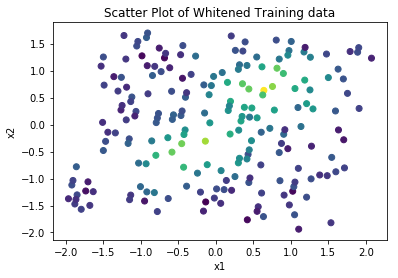

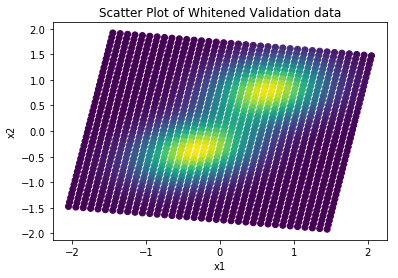

In [261]:
#whitening 
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

Xtc = Xt - np.mean(Xt,axis = 0)
Xvc = Xv - np.mean(Xv,axis = 0)
CovM = np.dot(Xtc.T,Xtc) / Xtc.shape[0]
ev,v = LA.eig(CovM)
ev = np.diag(ev**(-1*0.5))
Xts = np.dot(np.dot(ev,v),np.array(Xtc.T))
Xvs = np.dot(np.dot(ev,v),np.array(Xvc.T))
#plot of Training data (white)
plt.figure()
plt.title("Scatter Plot of Whitened Training data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(Xts[0,:],Xts[1,:],c = Yt)
#plot of Validation data 
plt.figure()
plt.title("Scatter Plot of Whitened Validation data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(Xvs[0,:],Xvs[1,:],c = Yv)


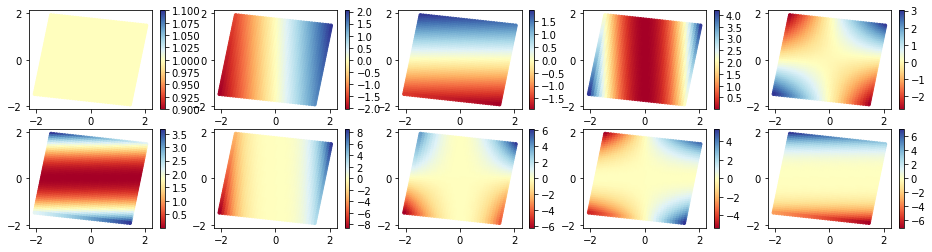

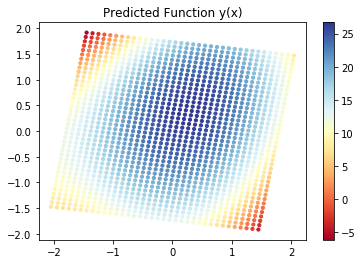

In [248]:
#b)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

m=9
d=np.zeros((2,55))
power = np.zeros((1,55,2,Xvs.shape[1]))
index = 0
Xvv = np.zeros((55,Xvs.shape[1]))
Xtt = np.zeros((55,Xts.shape[1]))
for i in np.arange(m+1):
   l = i 
   while(l>=0):
      power[0,index,0,:] = l
      k = i-l
      power[0,index,1,:] = k
      Xvv[index,:]= (Xvs[0,:]**l)*(Xvs[1,:]**k)
      Xtt[index,:]= (Xts[0,:]**l)*(Xts[1,:]**k)
      index += 1
      l -= 1 

Xtemp = Xvv[0:11,:]
w = LA.inv(Xtemp.dot(Xtemp.T)).dot(Xtemp).dot(Yv.T)
yp = w.T.dot(Xtemp)
fig = plt.figure(figsize=(16,4))
cm = plt.cm.get_cmap('RdYlBu')
#plot
for i in np.arange(10):
   ax1 = fig.add_subplot(2,5,i+1)
   sc =plt.scatter(Xvs[0,:],Xvs[1,:], c=Xtemp[i,:], vmin=np.min(Xtemp[i,:]), vmax=np.max(Xtemp[i,:]), s=10, cmap=cm)
   plt.colorbar(sc)

#predicted label y of validation
fig2 = plt.figure()
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xvs[0,:], Xvs[1,:], c=yp, vmin=np.min(yp), vmax=np.max(yp), s=10, cmap=cm)
plt.colorbar(sc)
plt.title("Predicted Function y(x)")
plt.show()



/Users/ozgesahin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ozgesahin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


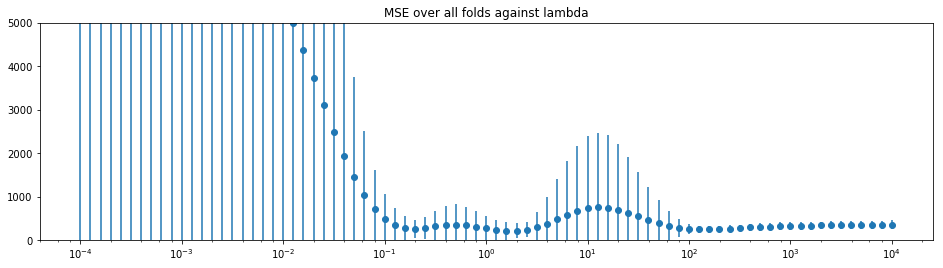

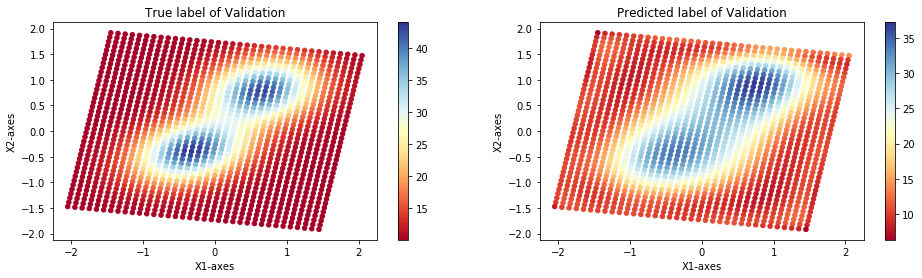

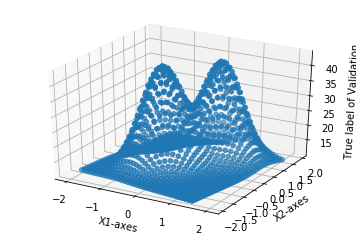

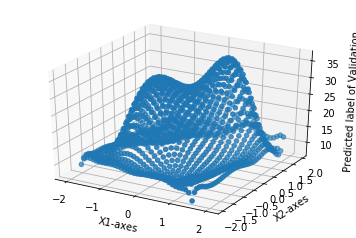

In [277]:
#cross validation

def cross_validation(f,X,Y):
   N = X.shape[1]
   N = f*(N/f)
   ind = np.random.permutation(np.arange(N,dtype=int))
   omse,std=[],[]
   listlambda = 10**np.arange(-4,4.1,0.1) 
   for lamb in listlambda:
      wmse =[]
      for ofold in range(f):
         otest = ind[ofold*(N/f):(ofold+1)*N/f]
         otrain = ind[(ofold+1)*N/f:N]
         Xtrain = X[:,otrain]
         Xtest = X[:,otest]
         w = LA.inv(Xtrain.dot(Xtrain.T)+lamb*np.eye(Xtrain.shape[0])).dot(Xtrain).dot(Y[otrain].T)
         y = (w.T).dot(Xtest)
         mse = np.mean((y -Y[otest])**2)
         wmse.append(mse)  
      omse.append(np.mean(wmse))
      std.append(np.std(wmse))
 
   return omse,std,listlambda  

omse1,std1,listlambda1 = cross_validation(10,Xtt,Yt)
#error
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.errorbar(listlambda1,omse1,yerr=std1,fmt='o')
ax.set_xscale('log')
ax.set_ylim(0,5000)
plt.title("MSE over all folds against lambda")
plt.show()
#best lambda 
bl = np.argmin(omse1)
lambda1 = listlambda1[bl]
#prediction of validation data with the best lambda
w = LA.inv(Xvv.dot(Xvv.T)+lambda1*np.eye(Xvv.shape[0])).dot(Xvv).dot(Yv.T)
Yvv = (w.T).dot(Xvv)
#plot
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xvs[0,:],Xvs[1,:], c=Yv, vmin=np.min(Yv), vmax=np.max(Yv), s=20, cmap=cm)
plt.colorbar(sc)
ax1.set_xlabel('X1-axes')
ax1.set_ylabel('X2-axes')
plt.title("True label of Validation")

ax2 = fig.add_subplot(122)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xvs[0,:],Xvs[1,:], c=Yvv, vmin=np.min(Yvv), vmax=np.max(Yvv), s=20, cmap=cm)
plt.colorbar(sc)
ax2.set_xlabel('X1-axes')
ax2.set_ylabel('X2-axes')
plt.title("Predicted label of Validation")
plt.show() 

#3D plot 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(Xvs[0,:],Xvs[1,:],Yv)
ax.set_xlabel('X1-axes')
ax.set_ylabel('X2-axes')
ax.set_zlabel('True label of Validation')
z_min = np.min(Yv)
z_max = np.max(Yv)
ax.set_zlim(z_min, z_max)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(Xvs[0,:],Xvs[1,:],Yvv)
ax.set_xlabel('X1-axes')
ax.set_ylabel('X2-axes')
ax.set_zlabel('Predicted label of Validation')
z_min = np.min(Yvv)
z_max = np.max(Yvv)
ax.set_zlim(z_min, z_max)
plt.show()  


/Users/ozgesahin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ozgesahin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.58489319246
0.063095734448
λG is different from λT


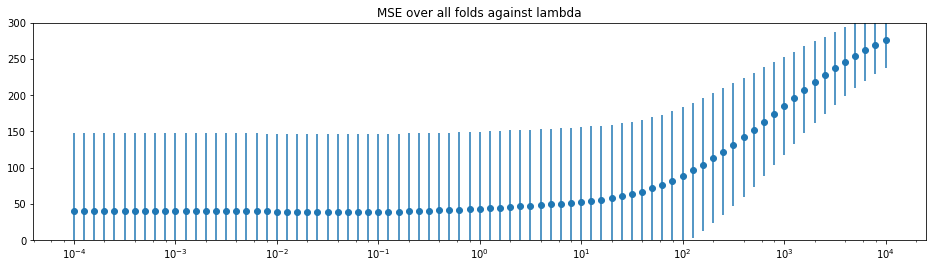

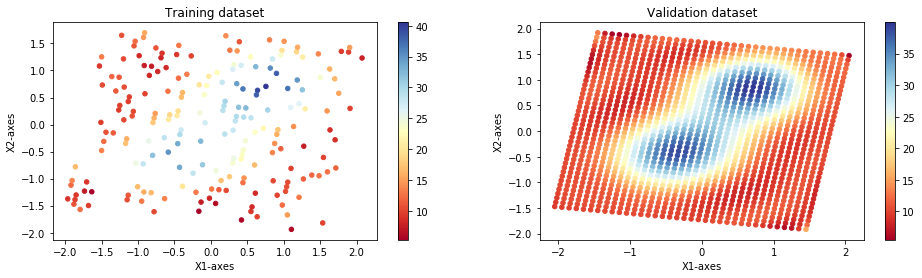

In [279]:
#d)

omse2,std2,listlambda2 = cross_validation(10,Xvv,Yv)
lambda2 = listlambda2[np.argmin(omse2)]
print(lambda1)
print(lambda2)
if lambda1 == lambda2 :
    print("λG is equal to λT")
else :
    print("λG is different from λT")
    
#comparison of validation and training 
w = LA.inv(Xvv.dot(Xvv.T)+lambda2*np.eye(Xvv.shape[0])).dot(Xvv).dot(Yv.T)
Yvvv = (w.T).dot(Xvv)

w = LA.inv(Xtt.dot(Xtt.T)+lambda2*np.eye(Xtt.shape[0])).dot(Xtt).dot(Yt.T)
Yttt = (w.T).dot(Xtt)

#error plot
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.errorbar(listlambda2,omse2,yerr=std2,fmt='o')
ax.set_xscale('log')
ax.set_ylim(0,300)
plt.title("MSE over all folds against lambda")
plt.show()

#plot
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xts[0,:],Xts[1,:], c=Yttt, vmin=np.min(Yttt), vmax=np.max(Yttt), s=20, cmap=cm)
plt.colorbar(sc)
ax1.set_xlabel('X1-axes')
ax1.set_ylabel('X2-axes')
plt.title("Training dataset")


ax2 = fig.add_subplot(122)
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xvs[0,:],Xvs[1,:], c=Yvvv, vmin=np.min(Yvvv), vmax=np.max(Yvvv), s=20, cmap=cm)
plt.colorbar(sc)
ax2.set_xlabel('X1-axes')
ax2.set_ylabel('X2-axes')
plt.title("Validation dataset")
plt.show()
